In [196]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import svm, tree
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_graphviz
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, cross_val_predict, LeaveOneOut
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from sklearn.mixture import GaussianMixture

import random
from datetime import datetime

In [197]:
solvent_data = pd.read_excel('/Users/jlisd/Downloads/AI Chem/AI Chem/Holistic prediction of enantioselectivity in asymmetric catalysis.Supplementary Data.xlsx', sheet_name = 'solvent')
solvent_data.set_index('solvent_name', inplace = True)
solvent_columns = list(solvent_data.columns)

In [198]:
nucleophile_data = pd.read_excel('/Users/jlisd/Downloads/AI Chem/AI Chem/Holistic prediction of enantioselectivity in asymmetric catalysis.Supplementary Data.xlsx', sheet_name = 'nucleophiles')
nucleophile_data.set_index('nucleophile_name', inplace = True)
nucleophile_columns = list(nucleophile_data.columns)

In [199]:
raw_catalyst_data = pd.read_excel('/Users/jlisd/Downloads/AI Chem/AI Chem/Holistic prediction of enantioselectivity in asymmetric catalysis.Supplementary Data.xlsx', sheet_name = 'full_catalyst')
raw_catalyst_data.rename(columns = {'last catalyst only S used': 'catalyst_name'}, inplace = True)

#Taking care of catalyst R/S
r_catalyst_data = raw_catalyst_data.copy()
for i in range(17):
    r_catalyst_data.iloc[i, 1] = r_catalyst_data.iloc[i, 1].replace('R/S', 'R')
    #print(r_catalyst_data.iloc[i, 1])
#r_catalyst_data.drop(17, inplace = True)    

s_catalyst_data = raw_catalyst_data.copy()
for i in range(17):
    s_catalyst_data.iloc[i, 1] = s_catalyst_data.iloc[i, 1].replace('R/S', 'S')
    #print(s_catalyst_data.iloc[i, 1])
    
catalyst_data = pd.concat([r_catalyst_data, s_catalyst_data])
catalyst_data.rename(columns = {'last catalyst only S used': 'catalyst_name'}, inplace = True)
catalyst_data.set_index('catalyst_name', inplace = True)

catalyst_columns = list(catalyst_data.columns)

catalyst_data

,Ar group,arhs,alhs,aavg,b,AREA(q),sin(AREA),Lwhole R,B1whole R,B5whole R,...,C3 A,C4 A,C5 A,C6 A,nPOsy,iPOsy,nPOas,iPOas,P,PNMR
catalyst_name,,,,,,,,,,,,,,,,,,,,,
"(R)-2,2'-Dihydroxy-3,3'-diphenyl-1,1'-binaphthalene cyclic phosphate",Ph,54.388,54.395,54.3915,56.388,70,0.773891,6.89,1.70,3.33,...,-0.23000,-0.22400,-0.21100,-0.186000,1085.06,364.3460,1306.55,271.6062,2.54600,266.5125
"(R)-3,3′-Bis(4-nitrophenyl)-1,1′-binaphthyl-2,2′-diyl hydrogenphosphate",4-NO2C6H4,52.789,52.801,52.7950,56.202,64,0.920026,8.28,1.70,3.34,...,-0.17700,0.01000,-0.19500,-0.207000,1086.44,320.2800,1310.44,295.3595,2.54500,266.1502
"(R)-3,3'-Bis[4-(2,4,6-trimethylphenyl)phenyl]-1,1'-binaphthyl-2,2'-diyl Hydrogen Phosphate","4-(2,4,6-MeC6H2)C6H4",53.962,53.963,53.9625,56.355,38,0.296369,12.27,2.97,4.61,...,-0.20700,-0.05300,-0.22300,-0.199000,1085.55,356.6200,1306.58,242.2277,2.54600,266.3224
"(R)-3,3′-Bis(4-chlorophenyl)-1,1′-binaphthyl-2,2′-diyl hydrogenphosphate",4-ClC6H4,53.704,53.718,53.7110,56.219,67,-0.855520,8.21,1.70,3.33,...,-0.23200,-0.03000,-0.25000,-0.190000,1085.19,338.5586,1306.11,286.4410,2.54600,266.1394
"(R)-3,3'-Bis(4-diphenyl)-1,1'-binaphthyl 2,2'-diyl hydrogenphosphate",4-PhC6H4,42.215,52.094,47.1545,55.769,50,-0.262375,11.22,2.01,3.50,...,-0.19550,-0.06650,-0.20200,-0.183500,1087.44,332.8368,1317.37,222.6765,2.53900,268.1404
"(R)-3,3′-Bis(4-trifluoromethylphenyl)-1,1′-binaphthyl-2,2′-diyl hydrogenphosphate",4-CF3C6H4,53.619,53.627,53.6230,56.229,56,-0.521551,8.28,1.83,3.34,...,-0.19300,-0.17200,-0.17700,-0.184000,1086.23,355.7629,1307.21,397.3333,2.54500,266.1523
"(R)-3,3′-Bis(3,5-dinitrolphenyl)-1,1′-binaphthyl-2,2′-diyl hydrogenphosphate","3,5-NO2C6H3",59.563,59.562,59.5625,55.628,66,-0.026551,7.58,1.70,5.12,...,0.02900,-0.17300,0.01300,-0.154000,1087.41,296.0611,1317.62,300.6142,2.54300,266.2896
"(R)-3,3'-Bis(3,5-diphenyl)phenyl-1,1'-binaphthyl-2,2'-diyl Hydrogen Phosphate","3,5-PhC6H3",42.585,60.259,51.4220,54.746,36,-0.991779,8.59,2.59,7.06,...,-0.04700,-0.18750,-0.05650,-0.171500,1085.98,366.5389,1310.24,248.6693,2.54800,269.8459
"(R)-3,3′-Bis[3,5-bis(trifluoromethyl)phenyl]-1,1′-binaphthyl-2,2′-diyl hydrogenphosphate","3,5-(CF3)2-C6H3",55.665,55.883,55.7740,56.229,62,-0.739181,7.44,2.39,5.06,...,-0.14850,-0.16150,-0.16650,-0.157000,1086.10,320.0554,1312.33,202.3039,2.54400,266.3457


In [200]:
iminium_data = pd.read_excel('/Users/jlisd/Downloads/AI Chem/AI Chem/Holistic prediction of enantioselectivity in asymmetric catalysis.Supplementary Data.xlsx', sheet_name = 'iminiums')
iminium_data.rename(columns = {'imine': 'iminium_name', 'electronic energy difference (kcal/mol) ': 'electronic energy difference (kcal/mol)'}, inplace = True)
#removed space at the end of electronic energy
iminium_data.set_index('iminium_name', inplace = True)
iminium_data.drop(labels = ['Unnamed: 1'], axis = 1, inplace = True)
for i in range(1, 181):
    z_iminium_name = '(Z)-Iminium ' + str(i)
    e_iminium_name = '(E)-Iminium ' + str(i)
    iminium_data.loc[z_iminium_name, 'electronic energy difference (kcal/mol)'] = iminium_data.loc[e_iminium_name, 'electronic energy difference (kcal/mol)']
iminium_columns = list(iminium_data.columns)

In [201]:
iminium_data.head()

,nNH,i NH,N,H (iminium),C,SubL,SubS,PG,PGL,PGB1,...,SL,SB1,SB5,LL,LB1,LB5,HOMO (iminium),LUMO (iminium),Polarizability (iminium),electronic energy difference (kcal/mol)
iminium_name,,,,,,,,,,,,,,,,,,,,,
(E)-Iminium 1,3474.83,97.5295,-0.426,0.442,0.487,-0.464,-0.697,0.030,8.85,1.76,...,3.59,1.7,2.12,4.61,1.7,7.04,-0.40205,-0.17518,201.89,1.62
(Z)-Iminium 1,3491.05,82.0336,-0.430,0.424,0.526,-0.488,-0.687,0.017,8.84,1.77,...,3.59,1.7,2.13,4.77,1.7,7.17,-0.40330,-0.17332,193.50,1.62
(E)-Iminium 2,3400.90,359.5285,-0.447,0.457,0.477,-0.466,-0.690,0.031,8.81,1.75,...,3.59,1.7,2.12,4.76,1.7,5.63,-0.40541,-0.17578,164.07,1.86
(Z)-Iminium 2,3494.88,82.0612,-0.438,0.425,0.523,-0.503,-0.689,0.022,8.85,1.76,...,3.59,1.7,2.13,4.66,1.7,5.07,-0.40963,-0.17836,160.51,1.86
(E)-Iminium 3,3196.55,910.2524,-0.419,0.469,0.420,-0.140,-0.690,0.032,8.79,1.74,...,3.59,1.7,2.12,7.09,1.7,7.45,-0.40169,-0.18157,220.26,0.69


In [202]:
class Reaction():
    
    def __init__(self, name, entry, catalyst, nucleophile, substrate, solvent, iminium_type, iminium, majorenantiomer, minorenantiomer, ee, G):
        self.name = name
        self.entry = entry
        self.catalyst = catalyst
        self.nucleophile = nucleophile
        self.substrate = substrate
        self.solvent = solvent
        self.iminium_type = iminium_type
        self.iminium = iminium
        self.majorenantiomer = majorenantiomer
        self.minorenantiomer = minorenantiomer
        self.ee = ee
        self.G = G
            
        self.solvent_properties = dict()
        for column in solvent_columns:
            self.solvent_properties[column] = solvent_data.loc[solvent, column]
            
        self.catalyst_properties = dict()
        for column in catalyst_columns:
            self.catalyst_properties[column] = catalyst_data.loc[catalyst, column]
            
        self.nucleophile_properties = dict()
        for column in nucleophile_columns:
            self.nucleophile_properties[column] = nucleophile_data.loc[nucleophile, column]
        
        self.e_iminium = '(E)-' + str(iminium)
        self.z_iminium = '(Z)-' + str(iminium)
        
        self.e_iminium_properties = dict()
        self.z_iminium_properties = dict()
        for column in iminium_columns:
            self.e_iminium_properties[column] = iminium_data.loc[self.e_iminium, column]
            self.z_iminium_properties[column] = iminium_data.loc[self.z_iminium, column]
            
        
            
    def __repr__(self):
        return "Reaction - {}".format(self.name)
        #iminium stuff

In [203]:
reactions = dict()

def process_data(reaction_number, reaction, iminium_type, sheetname = None):
    reaction_file = '/Users/jlisd/Downloads/AI Chem/AI Chem/reaction info 5-23/' + str(reaction_number) + ' ' + reaction + '.xlsx'
    if sheetname == None:
        data = pd.read_excel(reaction_file)
    else:
        data = pd.read_excel(reaction_file, sheet_name = sheetname)
        
    data.set_index('entry', inplace = True)
    
    entries = len(data)
    for entry in range(1, entries + 1):
        if sheetname == None:
            reaction_name = reaction + ' ' + str(entry)
        else:
            reaction_name = reaction + ' ' + sheetname + ' ' + str(entry)
        
        
        reactions[reaction_name] = Reaction(reaction_name, 
                                            entry,
                                            data.loc[entry, 'Catalyst'],
                                            data.loc[entry, 'Nucleophile'],
                                            data.loc[entry, 'Substrate'],
                                            data.loc[entry, 'Solvent'],
                                            iminium_type,
                                            data.loc[entry, 'Iminium'],
                                            data.loc[entry, 'Major Enantiomer'],
                                            data.loc[entry, 'Minor Enantiomer'],
                                            data.loc[entry, 'ee'],
                                            data.loc[entry, 'ΔΔG‡'])
        


In [204]:
process_data(1, 'Addition of Alcohols', 'E', 'Scope')
process_data(2, 'Addition of thiols', 'E', 'Catalyst & solvent screening da')
process_data(2, 'Addition of thiols', 'E', 'Effect of catalyst loading')
process_data(2, 'Addition of thiols', 'E', 'Imine scope')
process_data(2, 'Addition of thiols', 'E', 'Thiol scope')
process_data(3, 'Hydrophosphonylation of imines', 'E', 'Catalyst screening data')
process_data(3, 'Hydrophosphonylation of imines', 'E', 'Scope')
process_data(4, 'Addition of diazomethylphosphonates', 'E', "Optimization of catalyst and re")
process_data(4, 'Addition of diazomethylphosphonates', 'E', "Imine scope")
process_data(5, 'Addition of diazoacetamides', 'E', 'Catalyst screening data')
process_data(5, 'Addition of diazoacetamides', 'E', 'Solvent screening data')
process_data(5, 'Addition of diazoacetamides', 'E', 'Substrate(s) scope')
process_data(6, 'Strecker Reaction (with aldimines)', 'E', 'Catalyst screening data')
process_data(6, 'Strecker Reaction (with aldimines)', 'E', 'Solvent screening data')
process_data(6, 'Strecker Reaction (with aldimines)', 'E', 'Imine scope')
process_data(7, 'Peroxidation of imines', 'E', 'Catalyst screening data')
process_data(7, 'Peroxidation of imines', 'E', 'Solvent screening data')
process_data(7, 'Peroxidation of imines', 'E', 'Substrate(s) scope')
process_data(8, 'Transfer Hydrogenation of b,g-Alkynyl a-Imino Esters', 'E', 'Catalyst screening and reaction')
process_data(8, 'Transfer Hydrogenation of b,g-Alkynyl a-Imino Esters', 'E', 'Scope')
process_data(9, 'Transfer Hydrogenation of Enamides', 'E', 'Scope')
process_data(10, 'Transfer Hydrogenation of N-aryl imines (List)', 'Z', 'Catalyst screening data')
process_data(10, 'Transfer Hydrogenation of N-aryl imines (List)', 'Z', 'Imine scope')
process_data(11, 'Transfer Hydrogenation of N-aryl imines (Rueping)', 'Z', 'Catalyst screening data')
process_data(11, 'Transfer Hydrogenation of N-aryl imines (Rueping)', 'Z', 'Solvent screening data')
process_data(11, 'Transfer Hydrogenation of N-aryl imines (Rueping)', 'Z', 'Imine scope')
process_data(12, 'Reductive amination of N-aryl imines (Macmillan)', 'Z', 'Reaction optimization')
process_data(13, 'Transfer Hydrogenation of trifluoromethyl ketimines', 'Z', 'Benzothiazoline screening data')
process_data(13, 'Transfer Hydrogenation of trifluoromethyl ketimines', 'Z', 'Imine scope')
process_data(14, 'Transfer Hydrogenation of N-aryl imines by benzothiazoline', 'Z', 'Catalyst screening data')
process_data(14, 'Transfer Hydrogenation of N-aryl imines by benzothiazoline', 'Z', 'Benzothiazoline screening data')
process_data(14, 'Transfer Hydrogenation of N-aryl imines by benzothiazoline', 'Z', 'Imine scope')
process_data(15, 'Reductive amination of aliphatic ketones by benzothiazoline', 'Z', 'Catalyst screening data')
process_data(15, 'Reductive amination of aliphatic ketones by benzothiazoline', 'Z', 'Imine scope')
process_data(16, 'Transfer Hydrogenation of ethyl ketimines', 'Z', 'Benzothiazoline screening data')
process_data(16, 'Transfer Hydrogenation of ethyl ketimines', 'Z', 'Scope 1 benzothiazoline')
process_data(16, 'Transfer Hydrogenation of ethyl ketimines', 'Z', 'Scope 2 dihydropyridine')
process_data(17, 'Strecker Reaction (with ketimines)', 'Z', 'Catalyst screening data')
process_data(17, 'Strecker Reaction (with ketimines)', 'Z', 'Solvent data')
process_data(17, 'Strecker Reaction (with ketimines)', 'Z', 'Imine scope')
#process_data(18, 'Addition of enecarbamates to benzoyl imines')
#process_data(19, 'Hydrogenation of fluorinated alkynyl ketimines')
#process_data(20, 'Addition of thiols to imines (Denmark)')

In [205]:
print(len(reactions))

381


In [206]:
catalyst = pd.DataFrame(columns = ['Reaction'] + catalyst_columns)
catalyst.set_index('Reaction', inplace = True)

for reaction in reactions:
    for column in catalyst_columns:
        catalyst.loc[reaction, column] = reactions[reaction].catalyst_properties[column]
        
#first column is numerical

In [207]:
catalyst.head()

,Ar group,arhs,alhs,aavg,b,AREA(q),sin(AREA),Lwhole R,B1whole R,B5whole R,...,C3 A,C4 A,C5 A,C6 A,nPOsy,iPOsy,nPOas,iPOas,P,PNMR
Reaction,,,,,,,,,,,,,,,,,,,,,
Addition of Alcohols Scope 1,9-Anthryl,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,...,-0.054,-0.162,-0.059,-0.049,1088.24,321.983,1324.49,223.989,2.539,268.953
Addition of Alcohols Scope 2,9-Anthryl,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,...,-0.054,-0.162,-0.059,-0.049,1088.24,321.983,1324.49,223.989,2.539,268.953
Addition of Alcohols Scope 3,9-Anthryl,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,...,-0.054,-0.162,-0.059,-0.049,1088.24,321.983,1324.49,223.989,2.539,268.953
Addition of Alcohols Scope 4,9-Anthryl,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,...,-0.054,-0.162,-0.059,-0.049,1088.24,321.983,1324.49,223.989,2.539,268.953
Addition of Alcohols Scope 5,9-Anthryl,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,...,-0.054,-0.162,-0.059,-0.049,1088.24,321.983,1324.49,223.989,2.539,268.953


In [208]:
nucleophile = pd.DataFrame(columns = ['Reaction'] + nucleophile_columns)
nucleophile.set_index('Reaction', inplace = True)

for reaction in reactions:
    for column in nucleophile_columns:
        nucleophile.loc[reaction, column] = reactions[reaction].nucleophile_properties[column]
        
#first column is numerical

In [209]:
nucleophile.head()

,nucleophile,H (nucleophile),X,Nu,nXH,iXH,HOMO (nucleophile),LUMO (nucleophile),Polarizability (nucleophile),L,B1,B5,bond distance H-X,H-X-Nu,H-X-CNu
Reaction,,,,,,,,,,,,,,,
Addition of Alcohols Scope 1,methanol,0.458,-0.707,-0.707,3899.4,40.1897,-0.35328,0.0626,18.27,3.99,1.4,3.17,0.96,180,180
Addition of Alcohols Scope 2,ethanol,0.464,-0.717,-0.717,3893.54,39.6036,-0.34808,0.06264,30.23,5.03,1.2,3.41,0.96,180,180
Addition of Alcohols Scope 3,isopropanol,0.461,-0.717,-0.717,3877.1,28.7764,-0.34588,0.05777,42.01,5.03,1.13,4.45,0.96,180,180
Addition of Alcohols Scope 4,tert-butanol,0.459,-0.722,-0.722,3859.15,22.2253,-0.34415,0.05141,53.61,5.03,1.44,4.44,0.96,180,180
Addition of Alcohols Scope 5,2-chloroethanol,0.471,-0.704,-0.704,3851.9,43.4805,-0.3582,0.05955,40.75,3.98,1.4,4.44,0.96,180,180


In [210]:
solvent = pd.DataFrame(columns = ['Reaction'] + solvent_columns)
solvent.set_index('Reaction', inplace = True)

for reaction in reactions:
    for column in solvent_columns:
        solvent.loc[reaction, column] = reactions[reaction].solvent_properties[column]
        
#first column is numerical

In [211]:
solvent.head()

,solvent,First Zagreb,First Zagreb index by valence vertex degrees,Second Zagreb,Second Zagreb index by valence vertex degrees,Polarity,Narumi Simple Topological,Narumi Harmonic Topological,Narumi Geometric Topological,Total structure connectivity,...,CLOGP,MR,CMR,RMM,Density,no. of H bond donor,no. H bond acceptor,Polarizability (solvent),HOMO (solvent),LUMO (solvent)
Reaction,,,,,,,,,,,,,,,,,,,,,
Addition of Alcohols Scope 1,ethyl acetate,20,94,18,66,3,2.485,1.385,1.513,0.289,...,0.711,22.2,2.2214,88.11,0.902,0,2,54.4,-0.35344,0.05588
Addition of Alcohols Scope 2,ethyl acetate,20,94,18,66,3,2.485,1.385,1.513,0.289,...,0.711,22.2,2.2214,88.11,0.902,0,2,54.4,-0.35344,0.05588
Addition of Alcohols Scope 3,ethyl acetate,20,94,18,66,3,2.485,1.385,1.513,0.289,...,0.711,22.2,2.2214,88.11,0.902,0,2,54.4,-0.35344,0.05588
Addition of Alcohols Scope 4,ethyl acetate,20,94,18,66,3,2.485,1.385,1.513,0.289,...,0.711,22.2,2.2214,88.11,0.902,0,2,54.4,-0.35344,0.05588
Addition of Alcohols Scope 5,ethyl acetate,20,94,18,66,3,2.485,1.385,1.513,0.289,...,0.711,22.2,2.2214,88.11,0.902,0,2,54.4,-0.35344,0.05588


In [212]:
iminium = pd.DataFrame(columns = ['Reaction', "iminium_type"] + iminium_columns)
iminium.set_index('Reaction', inplace = True)

for reaction in reactions:
    if reactions[reaction].iminium_type == 'E':
        iminium.loc[reaction, "iminium_type"] = 'E'
        for column in iminium_columns:
            iminium.loc[reaction, column] = reactions[reaction].e_iminium_properties[column]
    elif reactions[reaction].iminium_type == 'Z':
        iminium.loc[reaction, "iminium_type"] = 'Z'
        for column in iminium_columns:
            iminium.loc[reaction, column] = reactions[reaction].z_iminium_properties[column]

            

In [213]:
iminium.head()

,iminium_type,nNH,i NH,N,H (iminium),C,SubL,SubS,PG,PGL,...,SL,SB1,SB5,LL,LB1,LB5,HOMO (iminium),LUMO (iminium),Polarizability (iminium),electronic energy difference (kcal/mol)
Reaction,,,,,,,,,,,,,,,,,,,,,
Addition of Alcohols Scope 1,E,3569.31,83.7481,-0.533,0.427,0.306,-0.2,0.255,0.69,6.63,...,2.58,1.09,1.09,6.76,1.7,3.39,-0.44273,-0.23633,180.99,6.67
Addition of Alcohols Scope 2,E,3569.31,83.7481,-0.533,0.427,0.306,-0.2,0.255,0.69,6.63,...,2.58,1.09,1.09,6.76,1.7,3.39,-0.44273,-0.23633,180.99,6.67
Addition of Alcohols Scope 3,E,3569.31,83.7481,-0.533,0.427,0.306,-0.2,0.255,0.69,6.63,...,2.58,1.09,1.09,6.76,1.7,3.39,-0.44273,-0.23633,180.99,6.67
Addition of Alcohols Scope 4,E,3569.31,83.7481,-0.533,0.427,0.306,-0.2,0.255,0.69,6.63,...,2.58,1.09,1.09,6.76,1.7,3.39,-0.44273,-0.23633,180.99,6.67
Addition of Alcohols Scope 5,E,3569.31,83.7481,-0.533,0.427,0.306,-0.2,0.255,0.69,6.63,...,2.58,1.09,1.09,6.76,1.7,3.39,-0.44273,-0.23633,180.99,6.67


In [214]:
ee = pd.DataFrame(columns = ['Reaction', 'ee'])
ee.set_index('Reaction', inplace = True)

for reaction in reactions:
    ee.loc[reaction, 'ee'] = reactions[reaction].ee

In [215]:
Y = pd.DataFrame(columns = ['Reaction', 'ΔΔG‡'])
Y.set_index('Reaction', inplace = True)

for reaction in reactions:
    Y.loc[reaction, 'ΔΔG‡'] = reactions[reaction].G
    

In [231]:
Y.to_excel('Y_is.xlsx')

In [216]:
print(catalyst.shape, nucleophile.shape, solvent.shape, iminium.shape, ee.shape)

(381, 85) (381, 15) (381, 160) (381, 22) (381, 1)


In [217]:
X_iminium = pd.concat([catalyst.drop(['Ar group'], axis = 1), 
               nucleophile.drop(['nucleophile'], axis = 1), 
               solvent.drop(['solvent'], axis = 1), 
               iminium.drop(['iminium_type'], axis = 1)], axis = 1)
X_iminium.shape

(381, 278)

In [218]:
X_iminium.iloc[:, 0:257]

,arhs,alhs,aavg,b,AREA(q),sin(AREA),Lwhole R,B1whole R,B5whole R,L2 R,...,CLOGP,MR,CMR,RMM,Density,no. of H bond donor,no. H bond acceptor,Polarizability (solvent),HOMO (solvent),LUMO (solvent)
Reaction,,,,,,,,,,,,,,,,,,,,,
Addition of Alcohols Scope 1,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,9.12,...,0.711,22.2,2.2214,88.11,0.902,0,2,54.4,-0.35344,0.05588
Addition of Alcohols Scope 2,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,9.12,...,0.711,22.2,2.2214,88.11,0.902,0,2,54.4,-0.35344,0.05588
Addition of Alcohols Scope 3,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,9.12,...,0.711,22.2,2.2214,88.11,0.902,0,2,54.4,-0.35344,0.05588
Addition of Alcohols Scope 4,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,9.12,...,0.711,22.2,2.2214,88.11,0.902,0,2,54.4,-0.35344,0.05588
Addition of Alcohols Scope 5,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,9.12,...,0.711,22.2,2.2214,88.11,0.902,0,2,54.4,-0.35344,0.05588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Strecker Reaction (with ketimines) Imine scope 6,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,9.12,...,2.641,31.17,3.1524,92.14,0.87,0,0,76.81,-0.29584,0.0237
Strecker Reaction (with ketimines) Imine scope 7,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,9.12,...,2.641,31.17,3.1524,92.14,0.87,0,0,76.81,-0.29584,0.0237
Strecker Reaction (with ketimines) Imine scope 8,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,9.12,...,2.641,31.17,3.1524,92.14,0.87,0,0,76.81,-0.29584,0.0237


In [219]:
#no iminium features
X_no_iminium = pd.concat([catalyst.drop(['Ar group'], axis = 1), 
               nucleophile.drop(['nucleophile'], axis = 1), 
               solvent.drop(['solvent'], axis = 1)], axis = 1)
X_no_iminium.shape

(381, 257)

In [220]:
X_no_iminium

,arhs,alhs,aavg,b,AREA(q),sin(AREA),Lwhole R,B1whole R,B5whole R,L2 R,...,CLOGP,MR,CMR,RMM,Density,no. of H bond donor,no. H bond acceptor,Polarizability (solvent),HOMO (solvent),LUMO (solvent)
Reaction,,,,,,,,,,,,,,,,,,,,,
Addition of Alcohols Scope 1,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,9.12,...,0.711,22.2,2.2214,88.11,0.902,0,2,54.4,-0.35344,0.05588
Addition of Alcohols Scope 2,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,9.12,...,0.711,22.2,2.2214,88.11,0.902,0,2,54.4,-0.35344,0.05588
Addition of Alcohols Scope 3,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,9.12,...,0.711,22.2,2.2214,88.11,0.902,0,2,54.4,-0.35344,0.05588
Addition of Alcohols Scope 4,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,9.12,...,0.711,22.2,2.2214,88.11,0.902,0,2,54.4,-0.35344,0.05588
Addition of Alcohols Scope 5,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,9.12,...,0.711,22.2,2.2214,88.11,0.902,0,2,54.4,-0.35344,0.05588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Strecker Reaction (with ketimines) Imine scope 6,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,9.12,...,2.641,31.17,3.1524,92.14,0.87,0,0,76.81,-0.29584,0.0237
Strecker Reaction (with ketimines) Imine scope 7,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,9.12,...,2.641,31.17,3.1524,92.14,0.87,0,0,76.81,-0.29584,0.0237
Strecker Reaction (with ketimines) Imine scope 8,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,9.12,...,2.641,31.17,3.1524,92.14,0.87,0,0,76.81,-0.29584,0.0237


In [221]:
X_no_nucleophile = pd.concat([catalyst.drop(['Ar group'], axis = 1), 
                   solvent.drop(['solvent'], axis = 1)], axis = 1)
X_no_nucleophile.shape

(381, 243)

In [222]:
for reaction in reactions:
    if iminium.loc[reaction, 'iminium_type'] == 'Z':
        Y.loc[reaction, 'ΔΔG‡'] = Y.loc[reaction, 'ΔΔG‡'] * (-1)

###############################################################################################################################

Reactions 18 - 20

###############################################################################################################################

In [223]:
#out of sample
X_oos = pd.read_excel('X_oos.xlsx', index = 'Reaction')
X_oos_iminium = pd.read_excel('X_oos_iminium.xlsx', index = Reaction)
Y_oos = pd.read_excel('Y_oos.xlsx', index = 'Reaction')

X_oos.set_index('Reaction', inplace = True)
X_oos_iminium.set_index('Reaction', inplace = True)
Y_oos.set_index('Reaction', inplace = True)

In [224]:
X_oos

,arhs,alhs,aavg,b,AREA(q),sin(AREA),Lwhole R,B1whole R,B5whole R,L2 R,...,CLOGP,MR,CMR,RMM,Density,no. of H bond donor,no. H bond acceptor,Polarizability (solvent),HOMO (solvent),LUMO (solvent)
Reaction,,,,,,,,,,,,,,,,,,,,,
Addition of enecarbamates to benzoyl imines 1,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,9.12,...,2.641,31.17,3.1524,92.14,0.87,0,0,76.81,-0.29584,0.0237
Addition of enecarbamates to benzoyl imines 2,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,9.12,...,2.641,31.17,3.1524,92.14,0.87,0,0,76.81,-0.29584,0.0237
Addition of enecarbamates to benzoyl imines 3,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,9.12,...,2.641,31.17,3.1524,92.14,0.87,0,0,76.81,-0.29584,0.0237
Addition of enecarbamates to benzoyl imines 4,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,9.12,...,2.641,31.17,3.1524,92.14,0.87,0,0,76.81,-0.29584,0.0237
Addition of enecarbamates to benzoyl imines 5,78.854,78.853,78.8535,55.161,61,-0.966118,6.94,1.73,5.72,9.12,...,2.641,31.17,3.1524,92.14,0.87,0,0,76.81,-0.29584,0.0237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Addition of thiols to imines (Denmark) 30,74.179,74.164,74.1715,54.611,47,0.123573,11.16,3.27,7.58,6.83,...,2.641,31.17,3.1524,92.14,0.87,0,0,76.81,-0.29584,0.0237
Addition of thiols to imines (Denmark) 31,74.179,74.164,74.1715,54.611,47,0.123573,11.16,3.27,7.58,6.83,...,2.641,31.17,3.1524,92.14,0.87,0,0,76.81,-0.29584,0.0237
Addition of thiols to imines (Denmark) 32,74.179,74.164,74.1715,54.611,47,0.123573,11.16,3.27,7.58,6.83,...,2.641,31.17,3.1524,92.14,0.87,0,0,76.81,-0.29584,0.0237


###############################################################################################################################

End of Data Processing

###############################################################################################################################

In [225]:
#random_state = random.seed(datetime.now())
random_state = 100
test_size = 0.5
X = X_iminium

In [226]:
scaler = StandardScaler()
X_total = pd.concat([X_iminium, X_oos_iminium])
X_total_scaled = scaler.fit_transform(X_total)
X_total_scaled = pd.DataFrame(X_total_scaled, columns = list(X_total.columns), index = list(X_total.index))

X_scaled = X_total_scaled.iloc[:381, :]
X_oos_scaled = X_total_scaled.iloc[381:, :]

In [229]:
X_scaled

,arhs,alhs,aavg,b,AREA(q),sin(AREA),Lwhole R,B1whole R,B5whole R,L2 R,...,SL,SB1,SB5,LL,LB1,LB5,HOMO (iminium),LUMO (iminium),Polarizability (iminium),electronic energy difference (kcal/mol)
Addition of Alcohols Scope 1,0.922953,0.982551,0.955027,-0.075354,0.832118,-1.036633,-1.055278,-1.080788,0.147314,1.429644,...,-0.736007,-0.887396,-0.762099,-0.660242,-0.451930,-0.527292,-0.752113,-1.024381,-0.605357,0.899093
Addition of Alcohols Scope 2,0.922953,0.982551,0.955027,-0.075354,0.832118,-1.036633,-1.055278,-1.080788,0.147314,1.429644,...,-0.736007,-0.887396,-0.762099,-0.660242,-0.451930,-0.527292,-0.752113,-1.024381,-0.605357,0.899093
Addition of Alcohols Scope 3,0.922953,0.982551,0.955027,-0.075354,0.832118,-1.036633,-1.055278,-1.080788,0.147314,1.429644,...,-0.736007,-0.887396,-0.762099,-0.660242,-0.451930,-0.527292,-0.752113,-1.024381,-0.605357,0.899093
Addition of Alcohols Scope 4,0.922953,0.982551,0.955027,-0.075354,0.832118,-1.036633,-1.055278,-1.080788,0.147314,1.429644,...,-0.736007,-0.887396,-0.762099,-0.660242,-0.451930,-0.527292,-0.752113,-1.024381,-0.605357,0.899093
Addition of Alcohols Scope 5,0.922953,0.982551,0.955027,-0.075354,0.832118,-1.036633,-1.055278,-1.080788,0.147314,1.429644,...,-0.736007,-0.887396,-0.762099,-0.660242,-0.451930,-0.527292,-0.752113,-1.024381,-0.605357,0.899093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Strecker Reaction (with ketimines) Imine scope 6,0.922953,0.982551,0.955027,-0.075354,0.832118,-1.036633,-1.055278,-1.080788,0.147314,1.429644,...,0.295417,0.848702,0.300370,3.145169,2.235035,-0.630275,1.340725,1.410810,2.106291,-0.597854
Strecker Reaction (with ketimines) Imine scope 7,0.922953,0.982551,0.955027,-0.075354,0.832118,-1.036633,-1.055278,-1.080788,0.147314,1.429644,...,0.295417,0.848702,0.300370,3.145169,2.338380,-0.630275,1.058174,1.086020,2.220543,-0.576199
Strecker Reaction (with ketimines) Imine scope 8,0.922953,0.982551,0.955027,-0.075354,0.832118,-1.036633,-1.055278,-1.080788,0.147314,1.429644,...,0.295417,0.848702,0.300370,0.745915,-0.141896,-0.619976,1.266056,0.950323,0.467852,-0.254071
Strecker Reaction (with ketimines) Imine scope 9,0.922953,0.982551,0.955027,-0.075354,0.832118,-1.036633,-1.055278,-1.080788,0.147314,1.429644,...,0.295417,0.848702,0.300370,1.220493,-0.451930,0.626109,1.323898,1.420118,1.319589,-0.443558


In [232]:
catalyst_columns.remove('Ar group')
nucleophile_columns.remove('nucleophile')
solvent_columns.remove('solvent')
catalyst_columns
nucleophile_columns
solvent_columns
iminium_columns

['nNH',
 'i NH',
 'N',
 'H (iminium)',
 'C',
 'SubL',
 'SubS',
 'PG',
 'PGL',
 'PGB1',
 'PGB5',
 'SL',
 'SB1',
 'SB5',
 'LL',
 'LB1',
 'LB5',
 'HOMO (iminium)',
 'LUMO (iminium)',
 'Polarizability (iminium)',
 'electronic energy difference (kcal/mol)']

In [241]:
iminium_columns

['nNH',
 'i NH',
 'N',
 'H (iminium)',
 'C',
 'SubL',
 'SubS',
 'PG',
 'PGL',
 'PGB1',
 'PGB5',
 'SL',
 'SB1',
 'SB5',
 'LL',
 'LB1',
 'LB5',
 'HOMO (iminium)',
 'LUMO (iminium)',
 'Polarizability (iminium)',
 'electronic energy difference (kcal/mol)']

In [167]:
X_total.to_excel('X (all features, total, not scaled).xlsx')
X.to_excel('X (all features, IS, not scaled).xlsx')
X_oos_iminium.to_excel('X (all features, OOS, not scaled).xlsx')

X_total_scaled.to_excel('X (all features, total, scaled).xlsx')
X_scaled.to_excel('X (all features, IS, scaled).xlsx')
X_oos_scaled.to_excel('X (all features, OOS, scaled).xlsx')

In [170]:
X_total_nuc = X_total.loc[:, catalyst_columns + nucleophile_columns + solvent_columns]
X_is_nuc = X.loc[:, catalyst_columns + nucleophile_columns + solvent_columns]
X_oos_nuc = X_oos_iminium.loc[:, catalyst_columns + nucleophile_columns + solvent_columns]

In [171]:
X_total_nuc_scaled = scaler.fit_transform(X_total_nuc)
X_total_nuc_scaled = pd.DataFrame(X_total_nuc_scaled, columns = list(X_total_nuc.columns), index = list(X_total_nuc.index))

X_is_nuc_scaled = X_total_nuc_scaled.iloc[:381, :]
X_oos_nuc_scaled = X_total_nuc_scaled.iloc[381:, :]

In [172]:
X_total_nuc.to_excel('X (nucleophile, total, not scaled).xlsx')
X_is_nuc.to_excel('X (nucleophile, IS, not scaled).xlsx')
X_oos_nuc.to_excel('X (nucleophile, OOS, not scaled).xlsx')

X_total_nuc_scaled.to_excel('X (nucleophile, total, scaled).xlsx')
X_is_nuc_scaled.to_excel('X (nucleophile, IS, scaled).xlsx')
X_oos_nuc_scaled.to_excel('X (nucleophile, OOS, scaled).xlsx')

In [194]:
X_is_imi_scaled

,arhs,alhs,aavg,b,AREA(q),sin(AREA),Lwhole R,B1whole R,B5whole R,L2 R,...,SL,SB1,SB5,LL,LB1,LB5,HOMO (iminium),LUMO (iminium),Polarizability (iminium),electronic energy difference (kcal/mol)
Addition of Alcohols Scope 1,0.922953,0.982551,0.955027,-0.075354,0.832118,-1.036633,-1.055278,-1.080788,0.147314,1.429644,...,-0.736007,-0.887396,-0.762099,-0.660242,-0.451930,-0.527292,-0.752113,-1.024381,-0.605357,0.899093
Addition of Alcohols Scope 2,0.922953,0.982551,0.955027,-0.075354,0.832118,-1.036633,-1.055278,-1.080788,0.147314,1.429644,...,-0.736007,-0.887396,-0.762099,-0.660242,-0.451930,-0.527292,-0.752113,-1.024381,-0.605357,0.899093
Addition of Alcohols Scope 3,0.922953,0.982551,0.955027,-0.075354,0.832118,-1.036633,-1.055278,-1.080788,0.147314,1.429644,...,-0.736007,-0.887396,-0.762099,-0.660242,-0.451930,-0.527292,-0.752113,-1.024381,-0.605357,0.899093
Addition of Alcohols Scope 4,0.922953,0.982551,0.955027,-0.075354,0.832118,-1.036633,-1.055278,-1.080788,0.147314,1.429644,...,-0.736007,-0.887396,-0.762099,-0.660242,-0.451930,-0.527292,-0.752113,-1.024381,-0.605357,0.899093
Addition of Alcohols Scope 5,0.922953,0.982551,0.955027,-0.075354,0.832118,-1.036633,-1.055278,-1.080788,0.147314,1.429644,...,-0.736007,-0.887396,-0.762099,-0.660242,-0.451930,-0.527292,-0.752113,-1.024381,-0.605357,0.899093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Strecker Reaction (with ketimines) Imine scope 6,0.922953,0.982551,0.955027,-0.075354,0.832118,-1.036633,-1.055278,-1.080788,0.147314,1.429644,...,0.295417,0.848702,0.300370,3.145169,2.235035,-0.630275,1.340725,1.410810,2.106291,-0.597854
Strecker Reaction (with ketimines) Imine scope 7,0.922953,0.982551,0.955027,-0.075354,0.832118,-1.036633,-1.055278,-1.080788,0.147314,1.429644,...,0.295417,0.848702,0.300370,3.145169,2.338380,-0.630275,1.058174,1.086020,2.220543,-0.576199
Strecker Reaction (with ketimines) Imine scope 8,0.922953,0.982551,0.955027,-0.075354,0.832118,-1.036633,-1.055278,-1.080788,0.147314,1.429644,...,0.295417,0.848702,0.300370,0.745915,-0.141896,-0.619976,1.266056,0.950323,0.467852,-0.254071
Strecker Reaction (with ketimines) Imine scope 9,0.922953,0.982551,0.955027,-0.075354,0.832118,-1.036633,-1.055278,-1.080788,0.147314,1.429644,...,0.295417,0.848702,0.300370,1.220493,-0.451930,0.626109,1.323898,1.420118,1.319589,-0.443558


In [174]:
X_total_imi = X_total.loc[:, catalyst_columns + solvent_columns + iminium_columns]
X_is_imi = X.loc[:, catalyst_columns + solvent_columns + iminium_columns]
X_oos_imi = X_oos_iminium.loc[:, catalyst_columns + solvent_columns + iminium_columns]

In [175]:
X_total_imi_scaled = scaler.fit_transform(X_total_imi)
X_total_imi_scaled = pd.DataFrame(X_total_imi_scaled, columns = list(X_total_imi.columns), index = list(X_total_imi.index))

X_is_imi_scaled = X_total_imi_scaled.iloc[:381, :]
X_oos_imi_scaled = X_total_imi_scaled.iloc[381:, :]

In [195]:
X_total_imi.to_excel('X (iminium, total, not scaled).xlsx')
X_is_imi.to_excel('X (iminium, IS, not scaled).xlsx')
X_oos_imi.to_excel('X (iminium, OOS, not scaled).xlsx')

X_total_imi_scaled.to_excel('X (iminium, total, scaled).xlsx')
X_is_imi_scaled.to_excel('X (iminium, IS, scaled).xlsx')
X_oos_imi_scaled.to_excel('X (iminium, OOS, scaled).xlsx')

In [46]:
#features = ['C', 'SL', 'H-X-Nu', 'PG', 'H-X-CNu']
#features = ['C', 'SL', 'PG']
#features = ['C', 'SL', 'PG']
features = ['H-X-Nu', 'H-X-CNu']

In [49]:
results = pd.DataFrame(columns = ['n_components', 'aic', 'bic'])
results.set_index('n_components', inplace = True)

for i in range(2, 20):
    gmm = GaussianMixture(n_components = i).fit(X_scaled.loc[:, features])
    results.loc[i, 'aic'] = gmm.aic(X_scaled.loc[:, features])
    results.loc[i, 'bic'] = gmm.bic(X_scaled.loc[:, features])

C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (12) found smaller than n_clusters (13). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (12) found smaller than n_clusters (14). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (12) found smaller than n_clusters (15). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (12) found smaller than n_clusters (16). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
C:\Users\jlisd\Anaco

In [50]:
results

,aic,bic
n_components,,
2,-3769.63,-3726.26
3,-4348.78,-4281.76
4,-7266.77,-7176.08
5,-7628.96,-7514.62
6,-7775.43,-7637.44
7,-7763.99,-7602.34
8,-7806.65,-7621.34
9,-7839.74,-7630.77
10,-7898.8,-7666.18


Text(0, 0.5, 'AIC/BIC score')

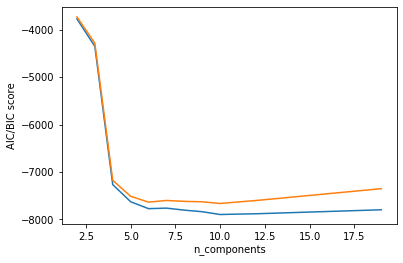

In [51]:
plt.plot(results.index, results['aic'])
plt.plot(results.index, results['bic'])
plt.xlabel('n_components')
plt.ylabel('AIC/BIC score')

In [153]:
X1 = X_scaled.iloc[0:20, :]
X2 = X_scaled.iloc[20:54, :]
X3 = X_scaled.iloc[54:70, :]
X4 = X_scaled.iloc[70:109, :]
X5 = X_scaled.iloc[109:138, :]
X6 = X_scaled.iloc[138:165, :]
X7 = X_scaled.iloc[165:191, :]
X8 = X_scaled.iloc[191:212, :]
X9 = X_scaled.iloc[212:222, :]
X10 = X_scaled.iloc[222:239, :]
X11 = X_scaled.iloc[239:263, :]
X12 = X_scaled.iloc[263:267, :]
X13 = X_scaled.iloc[267:281, :]
X14 = X_scaled.iloc[281:305, :]
X15 = X_scaled.iloc[305:323, :]
X16 = X_scaled.iloc[323:362, :]
X17 = X_scaled.iloc[362:381, :]

Xs = [X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17]

In [47]:
gmm = GaussianMixture(n_components = 11).fit(X_scaled.loc[:, features])
scores = gmm.score(X_scaled.loc[:, features])
scores_oos_18 = gmm.score(X_oos_scaled.loc[:, features].iloc[0:15, :])
scores_oos_19 = gmm.score(X_oos_scaled.loc[:, features].iloc[15:30, :])
scores_oos_20 = gmm.score(X_oos_scaled.loc[:, features].iloc[30:, :])


In [155]:
for i in range(17):
    X = Xs[i]
    print(str(i+1) + ': ' + str(gmm.score(X.loc[:, features])))

1: 21.298683387906436
2: 22.100539132983037
3: 18.409797966744485
4: 20.21048975758364
5: 21.734864820329943
6: 19.79175063549867
7: 20.919783172204827
8: 15.348433775000986
9: 20.24915051024873
10: 12.225441240553657
11: 11.978593861995686
12: 13.865969023626617
13: 14.654527475234024
14: 11.325249717465715
15: 16.554614791084294
16: 12.859505480840257
17: 12.515548910146528


In [48]:
print(scores_oos_18)
print(scores_oos_19)
print(scores_oos_20)
print(scores)

for i in range(0, 64):
    score = gmm.score(np.array(X_oos_scaled.loc[:, features].iloc[i, :]).reshape(1, -1))
    print(list(X_oos_scaled.index)[i], score)

-1147368.6412163866
8.599783473889769
11.302692275491557
10.52510738827344
Addition of enecarbamates to benzoyl imines 1 -1147368.6412163868
Addition of enecarbamates to benzoyl imines 2 -1147368.6412163868
Addition of enecarbamates to benzoyl imines 3 -1147368.6412163868
Addition of enecarbamates to benzoyl imines 4 -1147368.6412163868
Addition of enecarbamates to benzoyl imines 5 -1147368.6412163868
Addition of enecarbamates to benzoyl imines 6 -1147368.6412163868
Addition of enecarbamates to benzoyl imines 7 -1147368.6412163868
Addition of enecarbamates to benzoyl imines 8 -1147368.6412163868
Addition of enecarbamates to benzoyl imines 9 -1147368.6412163868
Addition of enecarbamates to benzoyl imines 10 -1147368.6412163868
Addition of enecarbamates to benzoyl imines 11 -1147368.6412163868
Addition of enecarbamates to benzoyl imines 12 -1147368.6412163868
Addition of enecarbamates to benzoyl imines 13 -1147368.6412163868
Addition of enecarbamates to benzoyl imines 14 -1147368.6412163

In [228]:
forest = RandomForestRegressor()
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = test_size, random_state = random_state)

forest.fit(X_train, Y_train.reset_index().drop('Reaction', axis = 1).values.ravel())
Y_pred = forest.predict(X_test)

results = pd.concat([Y_test.reset_index(), pd.DataFrame(Y_pred)], axis = 1)
results.set_index('Reaction', inplace = True)
results.columns = ['Actual', 'Predicted']

print('MSE: ' + str(mean_squared_error(Y_test, Y_pred)))
print('r^2: ' + str(r2_score(Y_test, Y_pred)))
results.head()

Y_train_pred = forest.predict(X_train)
train_results = pd.concat([Y_train.reset_index(), pd.DataFrame(Y_train_pred)], axis = 1)
train_results.set_index('Reaction', inplace = True)
train_results.columns = ['Actual', 'Predicted']
train_results

all_results = pd.concat([train_results, results])
all_results
print('Total r^2 score: ' + str(r2_score(all_results['Actual'], all_results['Predicted'])))

MSE: 0.20301140698938674
r^2: 0.9339052066415882
Total r^2 score: 0.960136265902632


In [ ]:
forest_iminium = RandomForestRegressor()
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = test_size, random_state = random_state)

forest_iminium.fit(X_train, Y_train.reset_index().drop('Reaction', axis = 1).values.ravel())
Y_pred = forest_iminium.predict(X_test)

results = pd.concat([Y_test.reset_index(), pd.DataFrame(Y_pred)], axis = 1)
results.set_index('Reaction', inplace = True)
results.columns = ['Actual', 'Predicted']

print('MSE: ' + str(mean_squared_error(Y_test, Y_pred)))
print('r^2: ' + str(r2_score(Y_test, Y_pred)))
results.head()

Y_train_pred = forest_iminium.predict(X_train)
train_results = pd.concat([Y_train.reset_index(), pd.DataFrame(Y_train_pred)], axis = 1)
train_results.set_index('Reaction', inplace = True)
train_results.columns = ['Actual', 'Predicted']
train_results

all_results = pd.concat([train_results, results])
all_results
print('Total r^2 score: ' + str(r2_score(all_results['Actual'], all_results['Predicted'])))

In [ ]:
forest_nucleophile = RandomForestRegressor()
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = test_size, random_state = random_state)

forest_nucleophile.fit(X_train, Y_train.reset_index().drop('Reaction', axis = 1).values.ravel())
Y_pred = forest_nucleophile.predict(X_test)

results = pd.concat([Y_test.reset_index(), pd.DataFrame(Y_pred)], axis = 1)
results.set_index('Reaction', inplace = True)
results.columns = ['Actual', 'Predicted']

print('MSE: ' + str(mean_squared_error(Y_test, Y_pred)))
print('r^2: ' + str(r2_score(Y_test, Y_pred)))
results.head()

Y_train_pred = forest_nucleophile.predict(X_train)
train_results = pd.concat([Y_train.reset_index(), pd.DataFrame(Y_train_pred)], axis = 1)
train_results.set_index('Reaction', inplace = True)
train_results.columns = ['Actual', 'Predicted']
train_results

all_results = pd.concat([train_results, results])
all_results
print('Total r^2 score: ' + str(r2_score(all_results['Actual'], all_results['Predicted'])))

In [55]:
OOS_pred = forest.predict(X_oos_scaled)

oos_results = pd.concat([Y_oos.reset_index(), pd.DataFrame(OOS_pred)], axis = 1)
oos_results.set_index('Reaction', inplace = True)
oos_results.columns = ['Actual', 'Predicted']

print('MSE: ' + str(mean_squared_error(Y_oos, OOS_pred)))
print('Mean Absolute Error 18: ' + str(mean_absolute_error(Y_oos.iloc[0:15, :], OOS_pred[0:15])))
print('Mean Absolute Error 19: ' + str(mean_absolute_error(Y_oos.iloc[15:30, :], OOS_pred[15:30])))
print('Mean Absolute Error 20: ' + str(mean_absolute_error(Y_oos.iloc[30:, :], OOS_pred[30:])))
print('r^2: ' + str(r2_score(Y_oos, OOS_pred)))
oos_results.head(30)

MSE: 0.6958068531078885
Mean Absolute Error 18: 0.27405684736842245
Mean Absolute Error 19: 1.343429248924609
Mean Absolute Error 20: 0.5783960629936608
r^2: 0.8564734307293677


,Actual,Predicted
Reaction,,
Addition of enecarbamates to benzoyl imines 1,2.169290,1.935635
Addition of enecarbamates to benzoyl imines 2,1.963952,1.716774
Addition of enecarbamates to benzoyl imines 3,1.963952,1.928693
Addition of enecarbamates to benzoyl imines 4,1.963952,1.928693
Addition of enecarbamates to benzoyl imines 5,1.881808,2.048755
Addition of enecarbamates to benzoyl imines 6,2.304448,2.138164
Addition of enecarbamates to benzoyl imines 7,2.169290,1.704932
Addition of enecarbamates to benzoyl imines 8,2.169290,1.738887
Addition of enecarbamates to benzoyl imines 9,2.304448,1.738887


In [93]:
forest.predict(np.array(X_oos_scaled[5,:]).reshape(1,-1))

array([2.0535355])

In [136]:
lasso = Lasso(alpha = 0.01)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = test_size, random_state = random_state)

lasso.fit(X_train, Y_train.reset_index().drop('Reaction', axis = 1).values.ravel())
Y_pred = lasso.predict(X_test)

results = pd.concat([Y_test.reset_index(), pd.DataFrame(Y_pred)], axis = 1)
results.set_index('Reaction', inplace = True)
results.columns = ['Actual', 'Predicted']

print('MSE: ' + str(mean_squared_error(Y_test, Y_pred)))
print('r^2: ' + str(r2_score(Y_test, Y_pred)))
results.head()

Y_train_pred = lasso.predict(X_train)
train_results = pd.concat([Y_train.reset_index(), pd.DataFrame(Y_train_pred)], axis = 1)
train_results.set_index('Reaction', inplace = True)
train_results.columns = ['Actual', 'Predicted']
train_results

all_results = pd.concat([train_results, results])
all_results
print('Total r^2 score: ' + str(r2_score(all_results['Actual'], all_results['Predicted'])))

results.head(30)

MSE: 0.3582951789852765
r^2: 0.8833491862967824
Total r^2 score: 0.9093371092931077


,Actual,Predicted
Reaction,,
Strecker Reaction (with aldimines) Imine scope 14,1.16312,0.848979
Transfer Hydrogenation of N-aryl imines by benzothiazoline Imine scope 5,-2.94915,-2.604199
Addition of diazomethylphosphonates Imine scope 16,2.45065,2.339905
Transfer Hydrogenation of N-aryl imines (Rueping) Solvent screening data 5,-1.14774,-0.823353
Transfer Hydrogenation of N-aryl imines (Rueping) Imine scope 11,-1.20112,-0.899970
Addition of diazoacetamides Solvent screening data 6,1.62926,1.572355
Hydrophosphonylation of imines Catalyst screening data 3,0.432777,0.588548
Strecker Reaction (with aldimines) Imine scope 1,1.93734,0.573645
"Transfer Hydrogenation of b,g-Alkynyl a-Imino Esters Scope 8",2.30445,1.522460


In [148]:
OOS_pred = lasso.predict(X_oos_scaled)

oos_results = pd.concat([Y_oos.reset_index(), pd.DataFrame(OOS_pred)], axis = 1)
oos_results.set_index('Reaction', inplace = True)
oos_results.columns = ['Actual', 'Predicted']

print('MSE: ' + str(mean_squared_error(Y_oos, OOS_pred)))
print('Mean Absolute Error 18: ' + str(mean_absolute_error(Y_oos.iloc[0:15, :], OOS_pred[0:15])))
print('Mean Absolute Error 19: ' + str(mean_absolute_error(Y_oos.iloc[15:30, :], OOS_pred[15:30])))
print('Mean Absolute Error 20: ' + str(mean_absolute_error(Y_oos.iloc[30:, :], OOS_pred[30:])))
print('r^2: ' + str(r2_score(Y_oos, OOS_pred)))
oos_results.tail(30)

MSE: 0.5860593069500888
Mean Absolute Error 18: 0.3903709567166945
Mean Absolute Error 19: 0.7673486938235891
Mean Absolute Error 20: 0.7293020864620401
r^2: 0.8791114497651719


,Actual,Predicted
Reaction,,
Addition of thiols to imines (Denmark) 5,2.304448,2.319362
Addition of thiols to imines (Denmark) 6,3.134303,2.174327
Addition of thiols to imines (Denmark) 7,1.531646,2.479978
Addition of thiols to imines (Denmark) 8,2.304448,2.223586
Addition of thiols to imines (Denmark) 9,3.134303,1.745210
Addition of thiols to imines (Denmark) 10,2.058288,2.215619
Addition of thiols to imines (Denmark) 11,2.058288,2.576155
Addition of thiols to imines (Denmark) 12,1.629256,2.881805
Addition of thiols to imines (Denmark) 13,1.743479,2.625414


In [186]:
def predict(X_input):
    Y_pred = pd.DataFrame(columns = ['Reaction', 'type', 'Predicted'])
    Y_pred.set_index('Reaction', inplace = True)
    
    for i in range(len(X_input.index)):
        gmm_score = gmm.score(np.array(X_input.loc[:, features].iloc[i, :]).reshape(1, -1))
        if gmm_score < 0:
            prediction = lasso.predict(np.array(X_input.iloc[i,:]).reshape(1,-1))
            Y_pred.loc[list(X_input.index)[i], 'Predicted'] = prediction
            Y_pred.loc[list(X_input.index)[i], 'type'] = 'Lasso'
        elif gmm_score > 0:
            prediction = forest.predict(np.array(X_input.iloc[i,:]).reshape(1,-1))
            Y_pred.loc[list(X_input.index)[i], 'Predicted'] = prediction
            Y_pred.loc[list(X_input.index)[i], 'type'] = 'RF'
    return Y_pred
    


In [187]:
results = predict(X_oos_scaled)

In [188]:
results

,type,Predicted
Reaction,,
Addition of enecarbamates to benzoyl imines 1,Lasso,[1.6447858709109389]
Addition of enecarbamates to benzoyl imines 2,Lasso,[1.5497922136082292]
Addition of enecarbamates to benzoyl imines 3,Lasso,[1.6682556616054975]
Addition of enecarbamates to benzoyl imines 4,Lasso,[1.6682556616054975]
Addition of enecarbamates to benzoyl imines 5,Lasso,[1.8511572116594743]
...,...,...
Addition of thiols to imines (Denmark) 30,RF,[2.5030361535978316]
Addition of thiols to imines (Denmark) 31,RF,[2.398625984335213]
Addition of thiols to imines (Denmark) 32,RF,[2.364847987549366]


In [170]:
oos_results = pd.concat([Y_oos, results], axis = 1)
#oos_results.set_index('Reaction', inplace = True)
oos_results.columns = ['Actual', 'type', 'Predicted']

#print('MSE: ' + str(mean_squared_error(Y_oos, results['Predicted'])))
#print('Mean Absolute Error 18: ' + str(mean_absolute_error(oos_results['Actual'][0:15], oos_results['Predicted'][0:15])))
#print('Mean Absolute Error 19: ' + str(mean_absolute_error(oos_results['Actual'][15:30], oos_results['Predicted'][15:30])))
#print('Mean Absolute Error 20: ' + str(mean_absolute_error(oos_results['Actual'][30:], oos_results['Predicted'][30:])))
#print('r^2: ' + str(r2_score(Y_oos, OOS_pred)))
oos_results.tail(34)

,Actual,type,Predicted
Reaction,,,
Addition of thiols to imines (Denmark) 1,3.134303,RF,[2.345899830821309]
Addition of thiols to imines (Denmark) 2,1.881808,RF,[2.160169297496477]
Addition of thiols to imines (Denmark) 3,1.531646,RF,[2.2037494760225056]
Addition of thiols to imines (Denmark) 4,2.058288,RF,[2.283504222388339]
Addition of thiols to imines (Denmark) 5,2.304448,RF,[2.2341325636254203]
Addition of thiols to imines (Denmark) 6,3.134303,RF,[2.433681116172567]
Addition of thiols to imines (Denmark) 7,1.531646,RF,[2.3104276438886]
Addition of thiols to imines (Denmark) 8,2.304448,RF,[2.326508913567909]
Addition of thiols to imines (Denmark) 9,3.134303,RF,[2.3723769470059084]
